# Klasifikasi Penyakit Daun Kentang

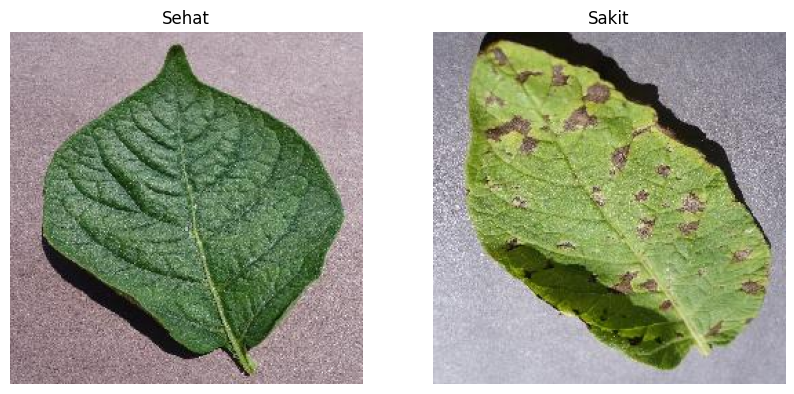

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10)) 

sehat = cv2.imread('./Sehat.jpg')
hasil_sehat = cv2.cvtColor(sehat, cv2.COLOR_BGR2RGB) 

plt.subplot(1, 2, 1)  
plt.imshow(hasil_sehat)
plt.title('Sehat') 
plt.axis('off')  


sakit = cv2.imread('./Sakit.jpg')
hasil_sakit = cv2.cvtColor(sakit, cv2.COLOR_BGR2RGB) 

plt.subplot(1, 2, 2) 
plt.imshow(hasil_sakit)
plt.title('Sakit') 
plt.axis('off')  

plt.show()

## Training

In [16]:
import cv2
import numpy as np
import os
import mahotas
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle

# Parameters
fixed_size = tuple((500, 500))
train_path = "Dataset/Train"
bins = 8

# Function to extract features
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return np.hstack([haralick, hist])

# Load dataset
data = []
labels = []

for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    if not os.path.isdir(folder_path):
        continue
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        image = cv2.imread(file_path)
        if image is None:
            continue
        image = cv2.resize(image, fixed_size)
        features = extract_features(image)
        data.append(features)
        labels.append(folder)

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions, target_names=le.classes_))

# Save model
with open("leaf_disease_model.pkl", 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'leaf_disease_model.pkl'")

                     precision    recall  f1-score   support

Potato_early_blight       1.00      1.00      1.00        29
     Potato_healthy       1.00      1.00      1.00        31

           accuracy                           1.00        60
          macro avg       1.00      1.00      1.00        60
       weighted avg       1.00      1.00      1.00        60

Model saved as 'leaf_disease_model.pkl'


In [17]:
import cv2
import numpy as np
import mahotas

def extract_features(image, bins=8):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return np.hstack([haralick, hist])

In [21]:
import cv2
import numpy as np

image_path = "Test.jpg"
model_path = "leaf_disease_model.pkl" 

# Load the image
image = cv2.imread(image_path)

if image is not None:
    # Resize the image
    fixed_size = (500, 500)
    image_resized = cv2.resize(image, fixed_size)

    features = extract_features(image_resized)
    features = features.reshape(1, -1)  

    # Make a prediction
    prediction = model.predict(features)

    # Define class names
    class_names = ['Sakit', 'Sehat']  
    print(f"Predicted : {class_names[int(prediction[0])]}")
else:
    print("Error loading image!")


Predicted : Sakit


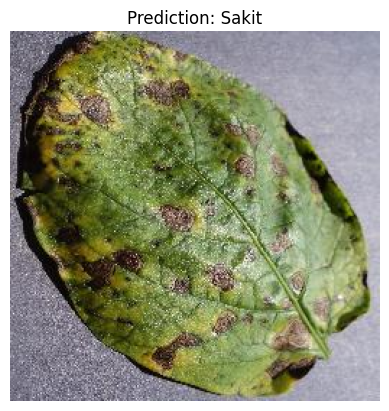

In [22]:
import matplotlib.pyplot as plt

# Display the image and prediction result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {class_names[int(prediction)]}")
plt.axis('off')
plt.show()

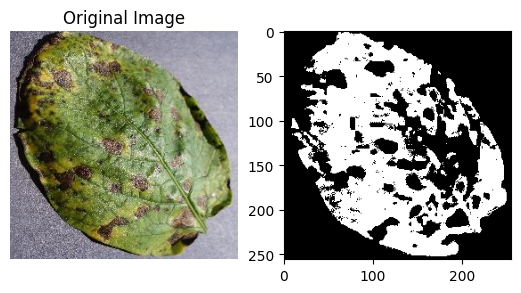

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def leaf_segment(hsv_image):   
    lower_green = np.array([25, 0, 20]) 
    upper_green = np.array([100, 255, 255]) 
    leaf_mask = cv2.inRange(hsv_image, lower_green, upper_green)
    return leaf_mask

def disease_segment(hsv_image):   
    lower_disease = np.array([10, 50, 50])   
    upper_disease = np.array([40, 255, 255])
    disease_mask = cv2.inRange(hsv_image, lower_disease, upper_disease)
    return disease_mask

def detect_disease_area(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    leaf_mask = leaf_segment(hsv_image)
    disease_mask = disease_segment(hsv_image)
    
    combined_mask = cv2.bitwise_and(leaf_mask, disease_mask)

    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    result_image = image.copy()
    for contour in contours:
        if cv2.contourArea(contour) > 500:  
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 0, 255), 2) 
    
    return result_image, combined_mask

image_path = "Test.jpg"
image = cv2.imread(image_path)

if image is not None:
    result_image, combined_mask = detect_disease_area(image)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Mask penyakit
    plt.subplot(1, 3, 2)
    plt.imshow(combined_mask, cmap='gray')

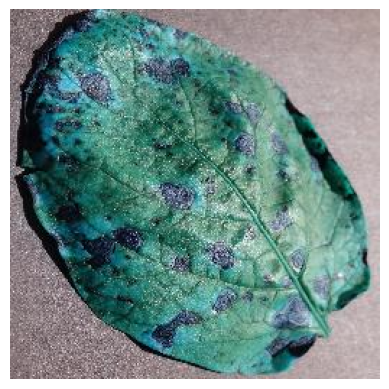

In [26]:
image = cv2.imread('Test.jpg')
plt.imshow(image)
plt.axis('off') 
plt.show()

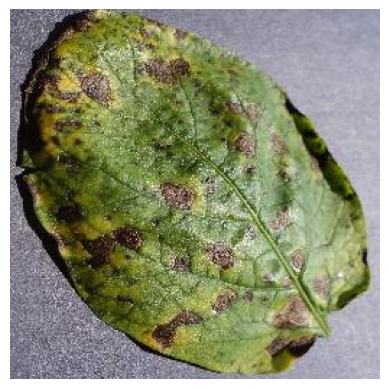

In [27]:
#Ubah RGB menjadi BGR

def bgr2rgb(image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    return rgb_img

rgb_image = bgr2rgb(image) 

plt.imshow(rgb_image)
plt.axis('off')
plt.show()

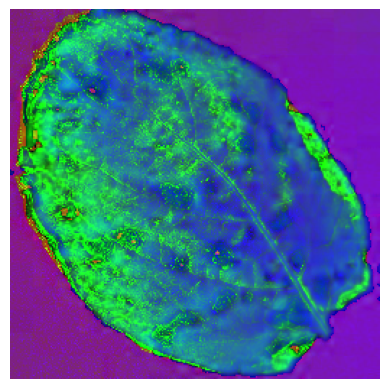

In [28]:
#Ubah RGB menjadi HSV

def rgb2hsv(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) 
    return hsv_image

hsv_image = rgb2hsv(rgb_image)

plt.imshow(hsv_image)
plt.axis('off')
plt.show()

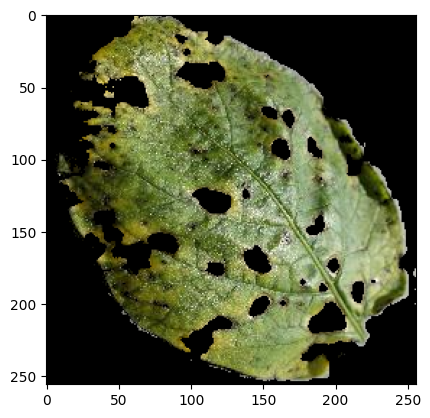

In [29]:
#Spot yang terkena penyakit

def leaf_segment(hsv_image):   
    lower_green = np.array([25,0,20]) 
    upper_green = np.array([100,255,255]) 
    leaf_mask = cv2.inRange(hsv_image, lower_green, upper_green) 
    return leaf_mask

leaf_result = cv2.bitwise_and(rgb_image, rgb_image, mask=leaf_segment(hsv_image)) 

plt.imshow(leaf_result)
plt.show()

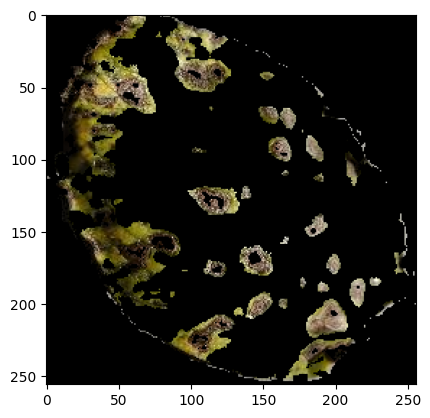

In [30]:
#Spot yang tidak terkena penyakit

def spot_segment(hsv_image):
    lower_brown = np.array([10,0,10]) 
    upper_brown = np.array([30,255,255]) 
    spot_mask = cv2.inRange(hsv_image, lower_brown, upper_brown) 
    return spot_mask
    
spots_result = cv2.bitwise_and(rgb_image, rgb_image, mask=spot_segment(hsv_image)) 

plt.imshow(spots_result)
plt.show()

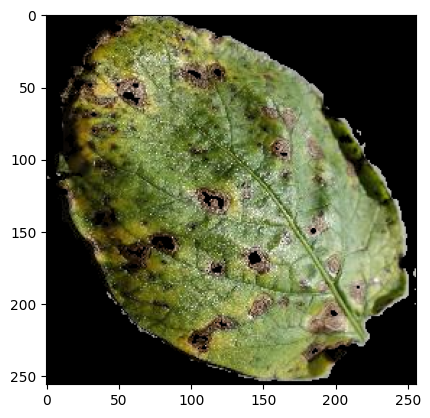

In [31]:
def final_segment(rgb_image, hsv_image):
    leaf = leaf_segment(hsv_image) 
    spots = spot_segment(hsv_image) 
    final_mask = leaf + spots 
    final_result = cv2.bitwise_and(rgb_image, rgb_image, mask=final_mask) 
    return final_result

final_image = final_segment(rgb_image,hsv_image)
plt.imshow(final_image)
plt.show()

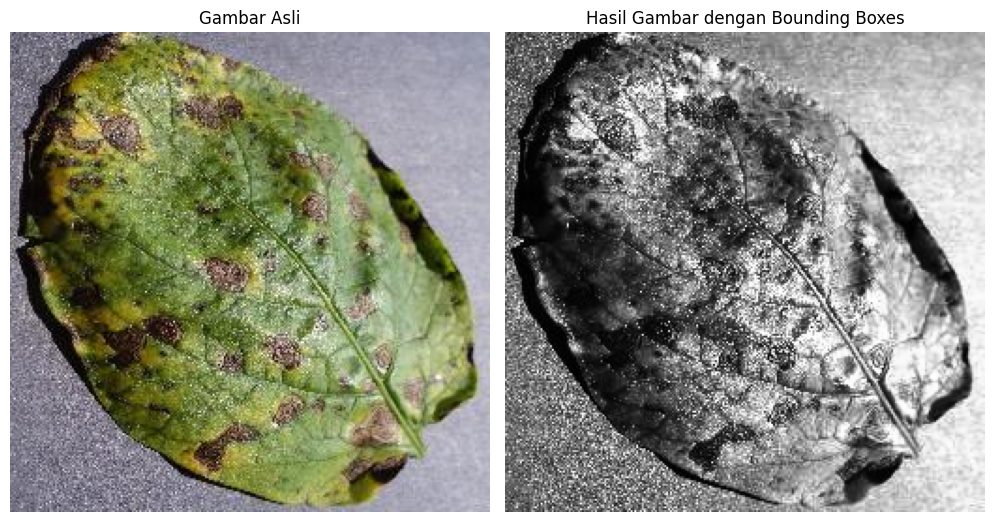

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def leaf_segment(hsv_image):   
    lower_green = np.array([25, 0, 20]) 
    upper_green = np.array([100, 255, 255]) 
    leaf_mask = cv2.inRange(hsv_image, lower_green, upper_green)
    return leaf_mask

def disease_segment(hsv_image):   
    lower_disease = np.array([10, 50, 50])   
    upper_disease = np.array([40, 255, 255])
    disease_mask = cv2.inRange(hsv_image, lower_disease, upper_disease)
    return disease_mask

def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equ = cv2.equalizeHist(gray_image)
    return cv2.cvtColor(equ, cv2.COLOR_GRAY2BGR)

def detect_disease_area(image):
    image = preprocess_image(image)
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    leaf_mask = leaf_segment(hsv_image)
    disease_mask = disease_segment(hsv_image)
    
    combined_mask = cv2.bitwise_and(leaf_mask, disease_mask)
    combined_mask = cv2.GaussianBlur(combined_mask, (5, 5), 0)

    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    result_image = image.copy()
    for contour in contours:
        if cv2.contourArea(contour) > 500:  
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  
    
    return result_image, combined_mask

# Load gambar
image_path = "Test.jpg"
image = cv2.imread(image_path)

if image is not None:
    result_image, combined_mask = detect_disease_area(image)

    plt.figure(figsize=(15, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Gambar Asli")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title("Hasil Gambar dengan Bounding Boxes")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("Error dari gambar")


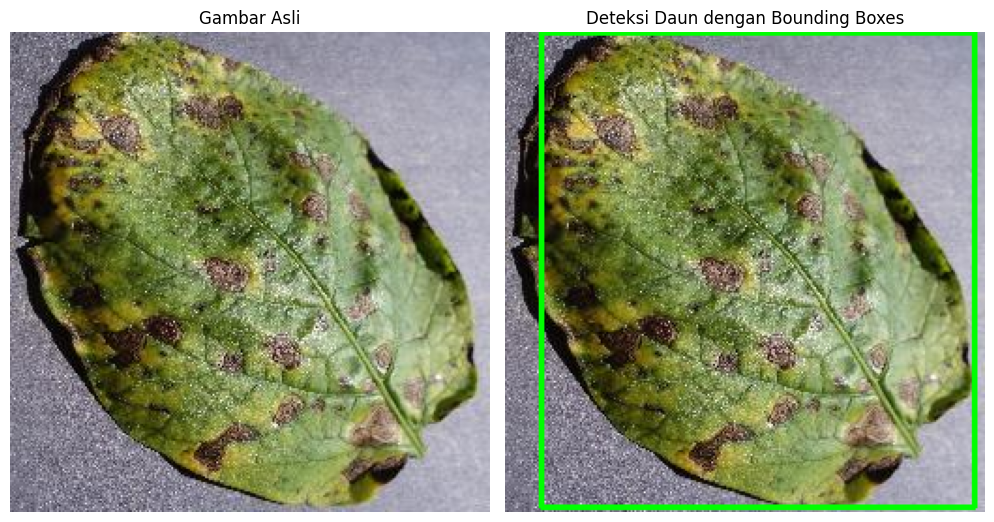

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def leaf_segment(hsv_image):
    lower_green = np.array([25, 50, 50])  
    upper_green = np.array([80, 255, 255])  
    leaf_mask = cv2.inRange(hsv_image, lower_green, upper_green)
    return leaf_mask

def detect_leaf(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    leaf_mask = leaf_segment(hsv_image)
    
    contours, _ = cv2.findContours(leaf_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    result_image = image.copy()

    for contour in contours:
        if cv2.contourArea(contour) > 500:  
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  
    
    return result_image, leaf_mask

image_path = "Test.jpg" 
image = cv2.imread(image_path)

if image is not None:
    result_image, leaf_mask = detect_leaf(image)
    
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Gambar Asli")
    plt.axis("off")

    # Gambar dengan kotak pada daun
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title("Deteksi Daun dengan Bounding Boxes")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

else:
    print("Error dari gambar")